# 誤差逆伝搬は難しくないと思ったのでメモ

多層パーセプトロンの誤差逆伝搬について。勾配法が分かれば理解できます。

## 勾配法

$ E(w) $を最小にする$ w $を求める方法。$w$に適当な初期値を与えて、以下の式を更新していけばよい。

\begin{equation}
w \leftarrow w - \eta \frac{d E(w)}{d w}
\tag{1}
\end{equation}

現在地から勾配を求めて山を下るというイメージ。

## 誤差逆伝搬

ネットワークの絵を描くといつもユニットが沢山あって混乱していたが、４つだけを考えると分かりやすい。

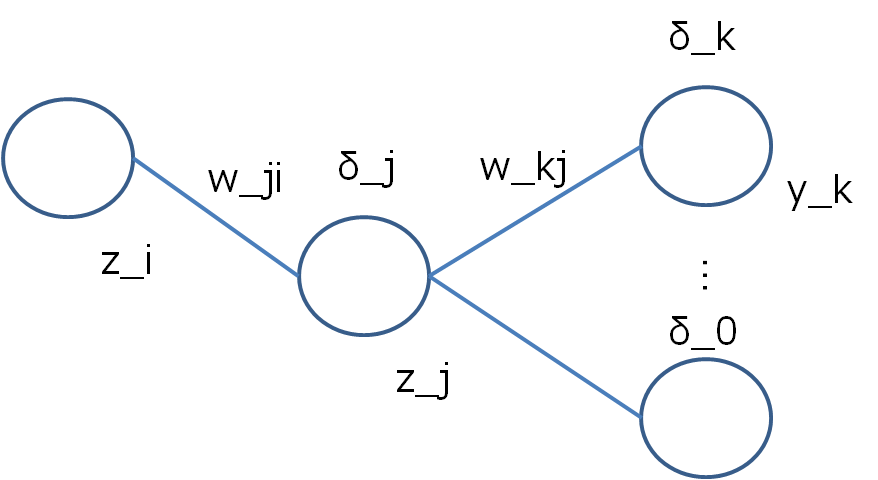

In [3]:
from IPython.display import Image
Image(filename='./誤差逆伝搬について_img01.png', width=600)

以下の順伝搬を持つネットワークの重み$w_{ji}$, $w_{kj}$を更新することを考える。

\begin{equation}
a_{j} = \Sigma_{i} w_{ji} z_{i} 
\tag{2}
\end{equation}

\begin{equation}
z_{j} = h( a_{j} )
\tag{3}
\end{equation}

\begin{equation}
a_{k} = \Sigma_{j} w_{kj} z_{j} 
\tag{4}
\end{equation}

\begin{equation}
y_{k} = g( a_{k} )
\tag{5}
\end{equation}

ここで、$y_{k}$はネットワークの出力、$h$,$g$は活性化関数である。
出力に対する教師データを$t_{k}$とすると、出力との二乗誤差は以下の式で表される。

\begin{equation}
E = \frac{1}{2} \Sigma_k ( y_{k} - t_{k})^2
\tag{6}
\end{equation}

(1)から、$w_{ji}$, $w_{kj}$を更新するにはそれぞれ、$\frac{\partial E}{\partial w_{ji}}$, $\frac{\partial E}{\partial w_{kj}}$を求めればよい。

まず、 $\frac{\partial E}{\partial w_{kj}}$を求める。微分の連鎖則を使って、

\begin{equation}
\frac{\partial E}{\partial w_{kj}} = 
\frac{\partial E}{\partial a_{k}} \frac{\partial a_{k}}{\partial w_{kj}} =
\delta_k z_j
\tag{7}
\end{equation}

ここで、$ \delta_k = \frac{\partial E}{\partial a_{k}} $と置いた。$ \delta_k $は誤差と呼ばれる。

\begin{equation}
\delta_k =
\frac{\partial E}{\partial a_{k}} =
\frac{\partial E}{\partial y_{k}} \frac{\partial y_{k}}{\partial a_{k}} =
( y_k - t_k ) g'( a_k )
\tag{8}
\end{equation}

次に、$\frac{\partial E}{\partial w_{ji}}$を求める。

\begin{equation}
\frac{\partial E}{\partial w_{ji}} = 
\frac{\partial E}{\partial a_{j}} \frac{\partial a_{j}}{\partial w_{ji}} =
\delta_j z_i
\tag{9}
\end{equation}

$ \delta_j = \frac{\partial E}{\partial a_{j}} $とした。$ \frac{\partial E}{\partial a_{j}} $は$j$に結合のある箇所すべてに対して評価することに気を付けて、以下のように表せる。

\begin{equation}
\delta_j =
\frac{\partial E}{\partial a_{j}} =
\Sigma_k \frac{\partial E}{\partial a_{k}} \frac{\partial a_{k}}{\partial a_{j}} =
\Sigma_k \frac{\partial E}{\partial a_{k}} \frac{\partial a_{k}}{\partial z_{j}} \frac{\partial z_{j}}{\partial a_{j}} = 
\Sigma_k \delta_k w_{kj} h'( a_{j} ) = 
 h'( a_{j} ) \Sigma_k \delta_k w_{kj}
\tag{10}
\end{equation}

$ E $を$ N $個のサンプルに対して評価する場合は、サンプルごとに勾配を計算したものを$ \frac{\partial E_{n}}{\partial w} $として、
$ \frac{\partial E}{\partial w} = \Sigma_n \frac{\partial E_{n}}{\partial w} $として求めればよい。

## 参考
C.M.ビショップ著, パターン認識と機械学習　上